In [2]:
#tensorflow and keras
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.1


In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot' ]

In [5]:
train_images.shape

(60000, 28, 28)

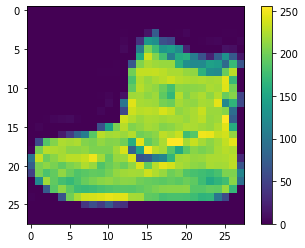

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

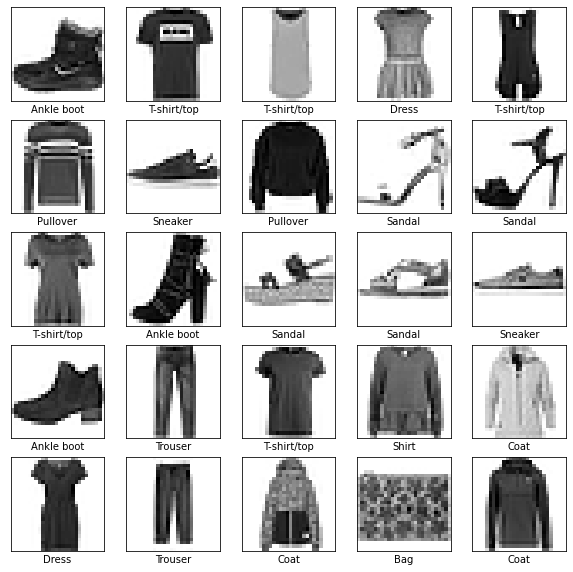

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [10]:
model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [11]:
model.fit(train_images, train_labels,  epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5049 - accuracy: 0.8217
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3771 - accuracy: 0.8640
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3361 - accuracy: 0.8784
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3116 - accuracy: 0.8858
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2943 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2809 - accuracy: 0.8971
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2693 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2586 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2488 - accuracy: 0.9073
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.241

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy: ', test_acc)

313/313 - 0s - loss: 0.3383 - accuracy: 0.8794

Test accuracy:  0.8794000148773193


In [13]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [14]:
predictions[0]

array([4.1624514e-08, 8.4700880e-10, 3.7594175e-10, 7.4117039e-11,
       7.9538465e-10, 6.5146727e-05, 2.7170043e-07, 2.6784502e-03,
       5.7494603e-08, 9.9725610e-01], dtype=float32)

In [15]:
np.argmax(predictions[0])

9

In [16]:
test_labels[0]

9

In [17]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color = color)
    
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


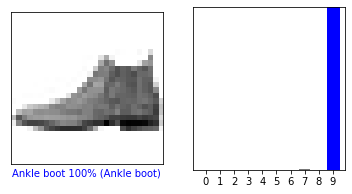

In [18]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

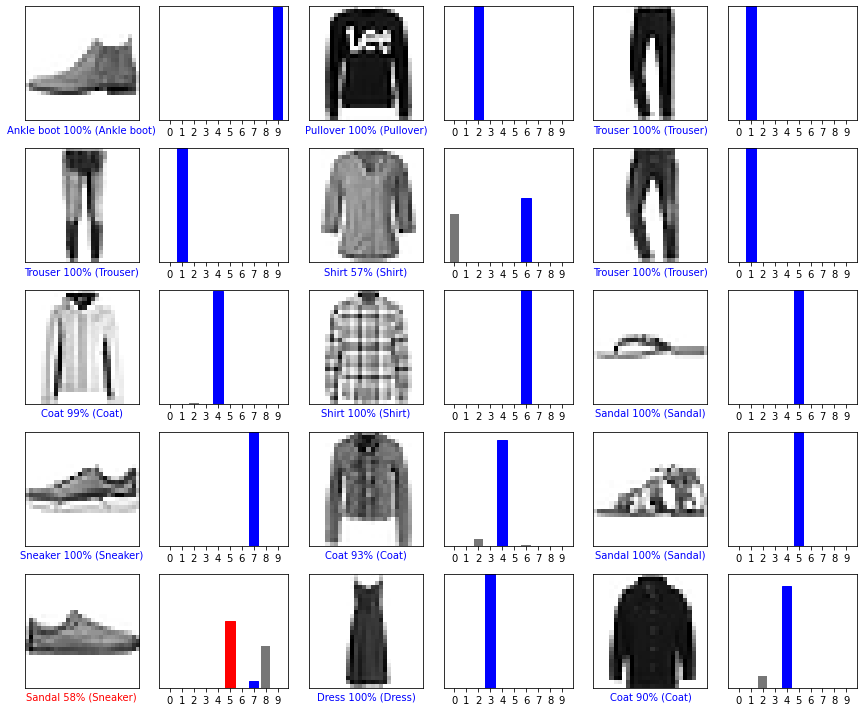

In [19]:
#plot n images
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)

plt.tight_layout()
plt.show()

In [20]:
#grab image from dataset
img = test_images[1]

print(img.shape)

(28, 28)


In [21]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [22]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[2.61828836e-06 1.80383357e-14 9.99364436e-01 6.52909904e-09
  3.10508651e-04 8.29508716e-14 3.22448032e-04 1.03043834e-16
  4.96337327e-09 4.61806916e-16]]


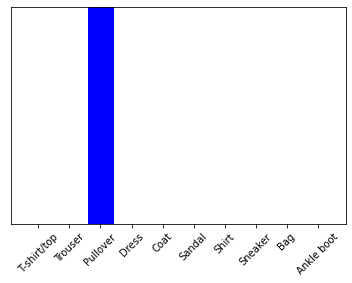

In [24]:
plot_value_array(1, predictions_single[0], test_labels)

_= plt.xticks(range(10), class_names, rotation=45)

In [25]:
np.argmax(predictions_single[0])

2